In [1]:
import qiskit

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\anirudh\appdata\local\temp\pip-req-build-8qiihhux



  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17069 sha256=8182749e5027c8d4ac30dbee762f8e18aa60a95320c6fb2f5f04bbc596486a0e
  Stored in directory: C:\Users\ANIRUDH\AppData\Local\Temp\pip-ephem-wheel-cache-pp4y1zor\wheels\80\c4\dd\b7ea1ee2a7247e8997db78bc777bbe22e61ab1e5ed1c4b46e1
Successfully built qiskit-textbook


In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg'
import numpy as np

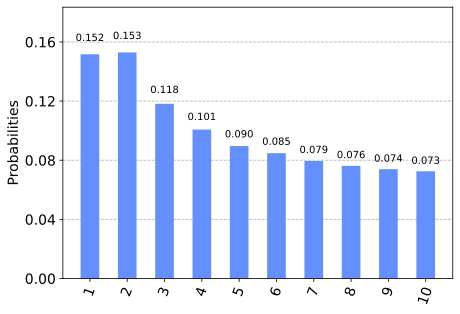

In [4]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
error = {}
for n in range(1,11):
    qc = QuantumCircuit(q,c)
    theta = np.pi
    for j in range(n):
        qc.rx(theta/n,q[0])
        qc.rz(theta/n,q[0])
    qc.h(q[0])
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
    except:
        pass
plot_histogram(error)